<a href="https://colab.research.google.com/github/nyayuchika/pcd-coursework/blob/master/PCD_Assignment02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Input citra

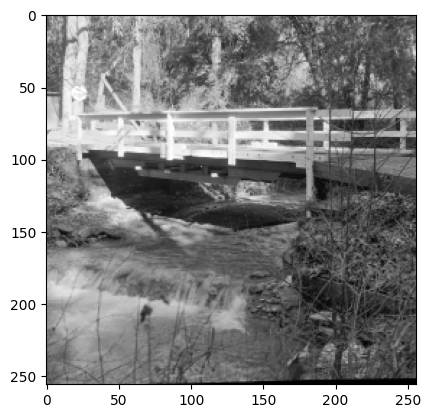

In [2]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('bridge.png',0)
plt.imshow(img, cmap='gray')

In [3]:
print(img.shape)

(256, 256)


In [4]:
print(img)

[[ 94  96 113 ... 145 139 107]
 [ 91 125 120 ...  92 105 110]
 [ 87 119 144 ...  87 101 102]
 ...
 [101  98  81 ...   0   0   0]
 [115 110  88 ...   0   0   0]
 [101 107  99 ...   0   0   0]]


Fungsi konvolusi



In [16]:
def konvolusi(image, kernel):
  baris_img, kolom_img = image.shape
  baris_kernel, kolom_kernel = kernel.shape

  #kernel berupa matriks persegi dan harus ganjil
  baris_padding = int((baris_kernel - 1) / 2)
  kolom_padding = int((kolom_kernel - 1) / 2)

  baris_baru = baris_img + 2 * baris_padding
  kolom_baru = kolom_img + 2 * kolom_padding

  #bentuk matriks zero padding
  padding = []
  for i in range(baris_baru):
    membentuk_padding = []
    for j in range(kolom_baru):
      membentuk_padding.append(0)
    padding.append(membentuk_padding)

  #proses padding matriks dengan zero padding
  for i in range(baris_img):
    for j in range(kolom_img):
      padding[i+baris_padding][j+kolom_padding] = image[i][j]

  #proses konvolusi
  hasil_konvolusi = []
  for i in range(baris_img):
    membentuk_hasil_konvolusi = []
    for j in range(kolom_img):
      membentuk_hasil_konvolusi.append(0)
    hasil_konvolusi.append(membentuk_hasil_konvolusi)

  for y in range(baris_img):
    for x in range(kolom_img):
      total = 0
      for i in range(baris_kernel):
        for j in range(kolom_kernel):
          total += kernel[i][j] * padding[y+i][x+j]
      hasil_konvolusi[y][x] = total
  return hasil_konvolusi, padding

Kernel

In [25]:
#Kernel
import numpy as np
#identical image
identical_kernel = np.array([[0, 0, 0],
                   [0, 1, 0],
                   [0, 0, 0]])
print(identical_kernel,'\n')

#shifted left by 1 pixel
shifted_kernel = np.array([[0, 0, 0],
                    [1, 0, 0],
                    [0, 0, 0]])
print(shifted_kernel,'\n')

#blur
blur_kernel = np.array([[1/9, 1/9, 1/9],
                        [1/9, 1/9, 1/9],
                        [1/9, 1/9, 1/9]])
print(blur_kernel,'\n')


# Sharpen kernel
sharpen_kernel = np.array([[[0, -1, 0],
                            [-1, 5, -1],
                            [0, -1, 0]]])
print(sharpen_kernel,'\n')

[[0 0 0]
 [0 1 0]
 [0 0 0]] 

[[0 0 0]
 [1 0 0]
 [0 0 0]] 

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]] 

[[[ 0 -1  0]
  [-1  5 -1]
  [ 0 -1  0]]] 

